In [2]:
import time
start_time = time.time()
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()

In [21]:
# Standard imports
import numpy as np
import pandas as pd
import time
import warnings

# Qiskit 
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, ADAM, SLSQP, AQGD
from qiskit_algorithms.utils import algorithm_globals

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit.visualization import plot_histogram
from IPython.display import clear_output

# Machine learning and preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [22]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
features = breast_cancer_data.data
labels = breast_cancer_data.target
features = MinMaxScaler().fit_transform(features)
algorithm_globals.random_seed = 4701

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size = 0.8, random_state = algorithm_globals.random_seed)
num_features = features.shape[1]

In [52]:
features = MinMaxScaler().fit_transform(features)
features

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [53]:
pca = decomposition.PCA(n_components=4)

pca.fit(features)
features = pca.transform(features)

In [54]:
features.shape

(569, 4)

(455, 4)

In [56]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size = 0.8, random_state = algorithm_globals.random_seed)
num_features = features.shape[1]

In [57]:
optimizer=COBYLA(maxiter=100)
feature_map = ZZFeatureMap(feature_dimension=features.shape[1], reps =1 )
ansatz = RealAmplitudes(num_qubits=features.shape[1], reps = 3)

In [58]:
sampler = Sampler()

In [59]:
objective_func_vals = []

# objective function characterizes the distance between the predictions and known labeled data.

plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
# Append the value of the objective function to an array so we 
# can plot the iteration verses the objective function value
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration- COBYLA & RealAmplitudes')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

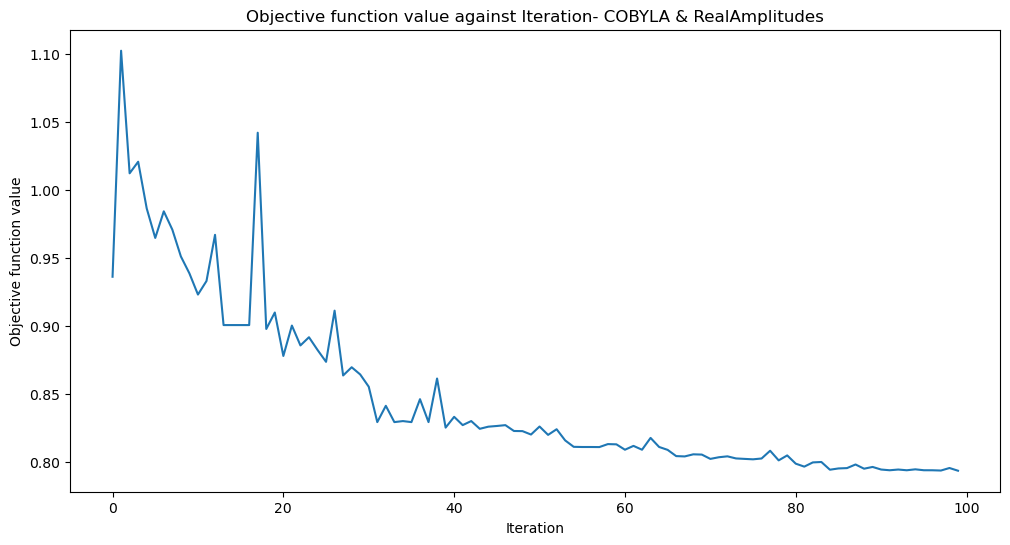

Training time: 302.7677090167999


In [60]:
vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

# Clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [61]:
print(vqc.score(test_features, test_labels))

0.7017543859649122


In [41]:
optimizer=SLSQP(maxiter=100)
feature_map = ZZFeatureMap(feature_dimension=4, reps =1 )
ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)

In [42]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration SLSQP Optimizer')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

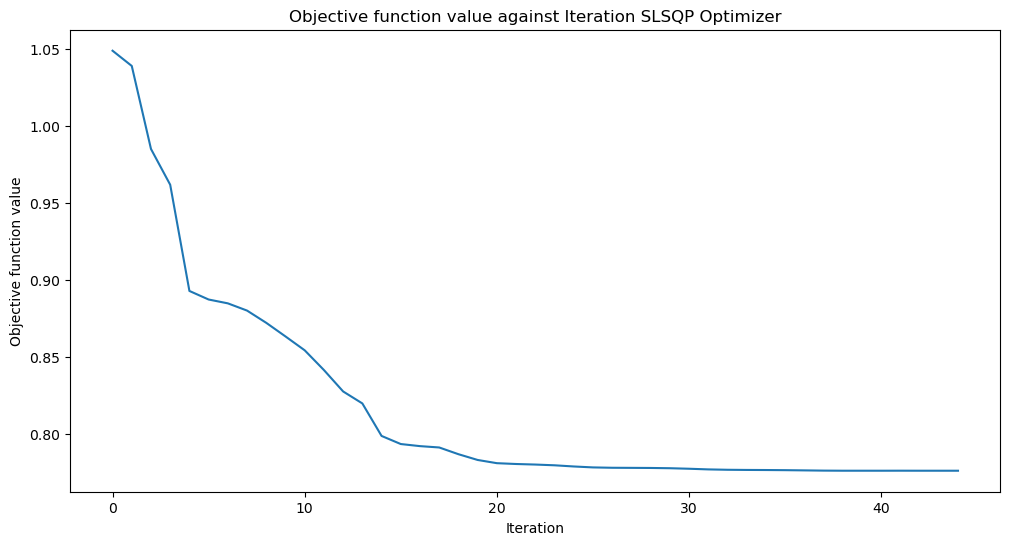

Training time: 2814.68998503685


In [43]:
vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [44]:
print(vqc.score(test_features, test_labels))

0.7368421052631579


In [ ]:
optimizer=COBYLA(maxiter=100)
feature_map = ZZFeatureMap(feature_dimension=4, reps =1 )
ansatz = EfficientSU2(num_qubits=num_features, reps = 3)

In [ ]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration EFF Ansatz')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

In [ ]:
vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [ ]:
optimizer=SLSQP(maxiter=100)
feature_map = ZZFeatureMap(feature_dimension=4, reps =1 )
ansatz = EfficientSU2(num_qubits=num_features, reps = 3)

In [ ]:
objective_func_vals = []
plt.rcParams['figure.figsize'] = (12,6)

def callback_graph(weights, obj_func_eval):
             
             clear_output(wait=True)
             objective_func_vals.append(obj_func_eval)
             plt.title('Objective function value against Iteration EFF Ansatz')
             plt.xlabel('Iteration')
             plt.ylabel('Objective function value')
             plt.plot(range(len(objective_func_vals)), objective_func_vals)
             
             plt.show()

In [ ]:
vqc = VQC(
    sampler = sampler, 
    feature_map = feature_map,
    ansatz = ansatz, 
    optimizer = optimizer, 
    callback = callback_graph,)

objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elsapsed_time = time.time() - start 

print(f'Training time: {elsapsed_time}')

In [ ]:
print(vqc.score(test_features, test_labels))

In [ ]:
# Preparing DataFrames each missing one feature
dfs = {
    "Full Features": df,
    "Missing Sepal Length": df.drop(columns=['sepal length (cm)']),
    "Missing Sepal Width": df.drop(columns=['sepal width (cm)']),
    "Missing Petal Length": df.drop(columns=['petal length (cm)']),
    "Missing Petal Width": df.drop(columns=['petal width (cm)']),
}

In [ ]:
optimizer=COBYLA(maxiter=100)
feature_map = ZZFeatureMap(feature_dimension=4, reps =1 )
ansatz = RealAmplitudes(num_qubits=num_features, reps = 3)

In [ ]:
def callback_graph(weights, obj_func_eval):
    global current_dataset
    clear_output(wait=True)
    objective_func_vals_dict[current_dataset].append(obj_func_eval)
    plt.title("Objective function value against Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    
    for description, obj_vals in objective_func_vals_dict.items():
        if obj_vals:  # Plot only if there are values
            iterations = range(len(obj_vals))
            plt.plot(iterations, obj_vals, label=description)
            # Annotate the most recent point
            plt.annotate(f"{obj_vals[-1]:.2f}",
                         (iterations[-1], obj_vals[-1]),
                         textcoords="offset points",
                         xytext=(0,10),
                         ha='center',
                         fontsize=8)

    plt.legend()
    plt.show()


In [ ]:
full_features = breast_cancer_data.data

In [ ]:
data_descriptions = ["Full Features", "Missing Sepal Length", "Missing Sepal Width", "Missing Petal Length",
                     "Missing Petal Width"]

In [ ]:
training_times = {}
vqc_scores = {}
plt.clf()
objective_func_vals_dict = {
    "Full Features": [],
    "Missing Sepal Length": [],
    "Missing Sepal Width": [],
    "Missing Petal Length": [],
    "Missing Petal Width": []
}

for i, description in enumerate(data_descriptions):
    features = full_features a
    if i == 0:
        features = features # Run VQC on full feature set first
    else:
        features = np.delete(features, i-1, axis = 1)
    
    num_features = features.shape[1]  # Adjusted to current feature count
    current_dataset = description
    
    # Dynamically adjust the feature map and ansatz for the current number of features
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    ansatz = EfficientSU2(num_qubits=num_features, reps=3)
    
    
    # Prepare features and labels
    features_scaled = MinMaxScaler().fit_transform(features)
    train_features, test_features, train_labels, test_labels = train_test_split(
        features_scaled, labels, train_size=0.8, random_state=algorithm_globals.random_seed)
    
    # Initialize VQC for the adjusted feature map and ansatz
    vqc = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=callback_graph
    )
    # Measure training time
    start_time = time.time()
    vqc.fit(train_features, train_labels)
    elapsed_time = time.time() - start_time
    
    # Scores
    train_score_quantum = vqc.score(train_features, train_labels)
    test_score_quantum = vqc.score(test_features, test_labels)
    vqc_scores[description] = {'Training Score': train_score_quantum, 'Test Score': test_score_quantum}

    # Store elapsed time for training
    training_times[description] = elapsed_time
    print(f"Training time: {elapsed_time:.2f} seconds")

In [ ]:
full_feature_test_score_quantum = vqc_scores['Full Features']['Test Score']
quantum_differences = {desc: vqc_scores[desc]['Test Score'] - full_feature_test_score_quantum 
                       for desc in vqc_scores if desc != "Full Features"}
descriptions_quantum = list(quantum_differences.keys())
quantum_diff_values = list(quantum_differences.values())

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(descriptions_quantum, quantum_diff_values, color='blue')
plt.xlabel('Configuration')
plt.ylabel('Difference in Test Accuracy from Full Features')
plt.title('Impact of Missing Features on Quantum Model Test Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# Print scores and differences for quantum models
print("Quantum Scores and Differences from Full Features:")
for description, scores in vqc_scores.items():
        test_score_quantum = scores['Test Score']
        difference_quantum = test_score_quantum - full_feature_test_score_quantum 
        print(f"{description}:")
        print(f"  - Quantum VQC on the training dataset: {scores['Training Score']:.2f}")
        print(f"  - Quantum VQC on the test dataset:     {test_score_quantum:.2f}")
        print(f"  - Difference from Full Features test score: {difference_quantum:.2f}\n")

In [ ]:
data = []
for description, scores in vqc_scores.items():
    test_score = scores['Test Score']
    difference_quantum = test_score - full_feature_test_score_quantum
    # Calculating the difference as a percentage
    difference_percentage = (difference_quantum / full_feature_test_score_quantum) * 100 if full_feature_test_score_quantum else 0
    data.append({"Description": description, 
                 "Test Score": test_score, 
                 "Difference from Full Features": difference_quantum,
                 "Percentage Difference from Full Features": difference_percentage})

# Creating the DataFrame
quantum_scores_df = pd.DataFrame(data)

In [ ]:
quantum_scores_df

In [ ]:
# Assuming quantum_scores_df is your DataFrame and it contains the 'Full Features' data

# Extract the 'Full Features' test score for reference
full_features_test_score = quantum_scores_df[quantum_scores_df['Description'] == 'Full Features']['Test Score'].values[0]

# Creating the plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Test Scores
ax[0].barh(categories, test_scores, color='blue')
ax[0].set_title('Test Dataset Scores')
ax[0].set_xlim(0, 1)
ax[0].axvline(x=full_features_test_score, color='red', linestyle='--', label='Full Features Score')  # Vertical line for Full Features score
ax[0].legend()

# Differences from Full Features
ax[1].barh(categories, differences, color='green')
ax[1].set_title('Difference from Full Features')
ax[1].set_xlim(min(differences)-0.05, max(differences)+0.05)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].axvline(x=0, color='black', linestyle='-', linewidth=2)

# Percentage Differences from Full Features
ax[2].barh(categories, percent_differences, color='green')
ax[2].set_title('% Difference from Full Features')
ax[2].set_xlim(min(percent_differences)-5, max(percent_differences)+5)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].axvline(x=0, color='black', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()


## Classical scores

Full Features:
  - Classical SVC on the training dataset: 0.98
  - Classical SVC on the test dataset:     0.93
  - Difference from Full Features test score: 0.00

Missing Sepal Length:
  - Classical SVC on the training dataset: 0.98
  - Classical SVC on the test dataset:     0.93
  - Difference from Full Features test score: 0.00

Missing Sepal Width:
  - Classical SVC on the training dataset: 0.98
  - Classical SVC on the test dataset:     0.90
  - Difference from Full Features test score: 0.03

Missing Petal Length:
  - Classical SVC on the training dataset: 0.97
  - Classical SVC on the test dataset:     0.93
  - Difference from Full Features test score: 0.00

Missing Petal Width:
  - Classical SVC on the training dataset: 0.95
  - Classical SVC on the test dataset:     0.90
  - Difference from Full Features test score: 0.03

In [ ]:
# Preparing classical SVC data for visualization
classical_svc_data = {
    "Description": [
        "Full Features",
        "Missing Sepal Length",
        "Missing Sepal Width",
        "Missing Petal Length",
        "Missing Petal Width"
    ],
    "Training Score": [0.98, 0.98, 0.98, 0.97, 0.95],
    "Test Score": [0.93, 0.93, 0.90, 0.93, 0.90],
    "Difference from Full Features": [0.00, 0.00, -0.03, 0.00, -0.03]
}

# Creating DataFrame
classical_svc_df = pd.DataFrame(classical_svc_data)

In [ ]:
# Assuming the classical_svc_data is provided as above, let's update it to include the percentage difference

# Update the classical_svc_data dictionary to include the calculation of percentage differences
for i, score in enumerate(classical_svc_data['Test Score']):
    # Calculating the percentage difference from the Full Features test score
    if classical_svc_data['Description'][i] == "Full Features":
        full_feature_test_score_classical = score
    difference = classical_svc_data['Difference from Full Features'][i]
    percentage_difference = (difference / full_feature_test_score_classical) * 100 if full_feature_test_score_classical else 0
    # Append the percentage difference to a new list if it's not the initial setup
    if 'Percentage Difference from Full Features' not in classical_svc_data:
        classical_svc_data['Percentage Difference from Full Features'] = []
    classical_svc_data['Percentage Difference from Full Features'].append(percentage_difference)

# Creating the updated DataFrame with percentage differences
classical_svc_df = pd.DataFrame(classical_svc_data)

classical_svc_df


In [ ]:
# Extract the 'Full Features' test score for reference
full_features_test_score_classical = classical_svc_df[classical_svc_df['Description'] == 'Full Features']['Test Score'].values[0]

# Extracting categories and scores from the DataFrame
categories_classical = classical_svc_df['Description']
test_scores_classical = classical_svc_df['Test Score']
differences_classical = classical_svc_df['Difference from Full Features']
percent_differences_classical = classical_svc_df['Percentage Difference from Full Features']

# Creating the plots with an additional subplot for percentage differences
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted for three subplots

# Test Scores
ax[0].barh(categories_classical, test_scores_classical, color='lightgreen')
ax[0].set_title('Classical SVC Test Dataset Scores')
ax[0].set_xlim(0, 1)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[0].axvline(x=full_features_test_score_classical, color='red', linestyle='--', label='Full Features Score')  # Vertical line for Full Features score
ax[0].legend()

# Absolute Differences from Full Features
ax[1].barh(categories_classical, differences_classical, color='salmon')
ax[1].set_title('Absolute Difference from Full Features (Classical SVC)')
ax[1].set_xlim(min(differences_classical)-0.05, max(differences_classical)+0.05)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].axvline(x=0, color='black', linestyle='-', linewidth=2)

# Percentage Differences from Full Features
ax[2].barh(categories_classical, percent_differences_classical, color='orange')
ax[2].set_title('Percentage Difference from Full Features (Classical SVC)')
ax[2].set_xlim(np.min(percent_differences_classical) - 5, np.max(percent_differences_classical) + 5)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].axvline(x=0, color='black', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()


In [ ]:
categories = quantum_scores_df['Description']  
percent_differences_quantum = quantum_scores_df['Percentage Difference from Full Features']
percent_differences_classical = classical_svc_df['Percentage Difference from Full Features']

# Creating the overlay plot with correct representation of positive and negative changes
fig, ax = plt.subplots(figsize=(10, 6))

# Setting positions for each category's bar groups
positions = np.arange(len(categories))

# Plotting percentage differences for quantum and classical with correct +/- representation
ax.barh(positions - 0.2, percent_differences_quantum, height=0.4, label='Quantum', color='green')
ax.barh(positions + 0.2, percent_differences_classical, height=0.4, label='Classical', color='orange')

# Setting labels, title, and customizing the axes and legend
ax.set(yticks=positions, yticklabels=categories)
ax.set_title('Percentage Difference from Full Features: Quantum vs Classical')
ax.set_xlabel('Percentage Difference from Full Features (%)')
ax.legend()

# Adding grid lines and emphasizing the line at x = 0 to highlight no change
ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
def callback_graph(weights, obj_func_eval):
    global current_dataset
    clear_output(wait=True)
    objective_func_vals_dict[current_dataset].append(obj_func_eval)
    plt.title("Objective function value against Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    
    for description, obj_vals in objective_func_vals_dict.items():
        if obj_vals:  # Plot only if there are values
            iterations = range(len(obj_vals))
            plt.plot(iterations, obj_vals, label=description)
            # Annotate the most recent point
            plt.annotate(f"{obj_vals[-1]:.2f}",
                         (iterations[-1], obj_vals[-1]),
                         textcoords="offset points",
                         xytext=(0,10),
                         ha='center',
                         fontsize=8)

    plt.legend()
    plt.show()


In [ ]:
training_times = {}
vqc_scores = {}
plt.clf()
objective_func_vals_dict = {
    "Full Features": [],
    "Missing Sepal Length": [],
    "Missing Sepal Width": [],
    "Missing Petal Length": [],
    "Missing Petal Width": []
}

for i, description in enumerate(data_descriptions):
    features = full_features
    if i == 0:
        features = features # Run VQC on full feature set first
    else:
        features = np.delete(features, i-1, axis = 1)
    
    num_features = features.shape[1]  # Adjusted to current feature count
    current_dataset = description
    
    # Dynamically adjust the feature map and ansatz for the current number of features
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    ansatz = EfficientSU2(num_qubits=num_features, reps=4)
    
    
    # Prepare features and labels
    features_scaled = MinMaxScaler().fit_transform(features)
    train_features, test_features, train_labels, test_labels = train_test_split(
        features_scaled, labels, train_size=0.8, random_state=algorithm_globals.random_seed)
    
    # Initialize VQC for the adjusted feature map and ansatz
    vqc = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=SLSQP(maxiter=100),
        callback=callback_graph
    )
    # Measure training time
    start_time = time.time()
    vqc.fit(train_features, train_labels)
    elapsed_time = time.time() - start_time
    
    # Scores
    train_score_quantum = vqc.score(train_features, train_labels)
    test_score_quantum = vqc.score(test_features, test_labels)
    vqc_scores[description] = {'Training Score': train_score_quantum, 'Test Score': test_score_quantum}

    # Store elapsed time for training
    training_times[description] = elapsed_time
    print(f"Training time: {elapsed_time:.2f} seconds")

In [ ]:
end_time = time.time()
total_runtime = end_time - start_time
print(f"Total Notebook Runtime: {total_runtime} seconds")

In [ ]:
full_feature_test_score_quantum = vqc_scores['Full Features']['Test Score']
quantum_differences = {desc: vqc_scores[desc]['Test Score'] - full_feature_test_score_quantum 
                       for desc in vqc_scores if desc != "Full Features"}
descriptions_quantum = list(quantum_differences.keys())
quantum_diff_values = list(quantum_differences.values())

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(descriptions_quantum, quantum_diff_values, color='blue')
plt.xlabel('Configuration')
plt.ylabel('Difference in Test Accuracy from Full Features')
plt.title('Impact of Missing Features on Quantum Model Test Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# Print scores and differences for quantum models
print("Quantum Scores and Differences from Full Features:")
for description, scores in vqc_scores.items():
        test_score_quantum = scores['Test Score']
        difference_quantum = test_score_quantum - full_feature_test_score_quantum 
        print(f"{description}:")
        print(f"  - Quantum VQC on the training dataset: {scores['Training Score']:.2f}")
        print(f"  - Quantum VQC on the test dataset:     {test_score_quantum:.2f}")
        print(f"  - Difference from Full Features test score: {difference_quantum:.2f}\n")

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(vqc, test_features, test_labels,
                           n_repeats=30,
                           random_state=0)

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{breast_cancer_data.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = breast_cancer_data.feature_names

# Indices of features, sorted by importance
sorted_idx = r.importances_mean.argsort()[::-1]

# Prepare labels and their corresponding importance scores and std deviations
labels = np.array(feature_names)[sorted_idx]
importance_means = r.importances_mean[sorted_idx]
importance_stds = r.importances_std[sorted_idx]

# Filter based on your criteria for significance
significant_indices = [i for i in range(len(importance_means)) if importance_means[i] - 2 * importance_stds[i] > 0]
significant_labels = labels[significant_indices]
significant_means = importance_means[significant_indices]
significant_stds = importance_stds[significant_indices]

# Plot
plt.barh(significant_labels, significant_means, xerr=significant_stds, align='center')
plt.xlabel('Mean Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()
